# 데이터 시각화 배워보기

이전 장에서는 데이터를 분석하는 법에 대해 배웠으며, 이번 장에서는 데이터 및 분석된 자료를 시각화 하는법에 대해 배워보겠다. 데이터를 글자나 표가 아닌 그림으로 나타낼 경우 훨씬 직관적으로 이해가 가능하다. 파이썬에서는 데이터 시각화에 matplotlib 혹은 pandas 패키지를 사용하며, 고급 시각화에는 seaborn 패키지를 사용한다.

## 그래프의 구성요소

그래프를 그리기에 앞서, 그래프는 어떠한 요소들로 이루어져있는지 알아보도록 하자.

<img src="https://github.com/hyunyulhenry/quant_py/blob/main/image/plot/matplotlib.png?raw=true" width = "500">

- Figure: 그림 전체
- Axes: 그림 내부의 좌표축을 의미하며, 개별 그림을 의미
- Line: 선 그래프에서 선
- Markers: 점 그래프에서 마커
- Legend: 범례
- Title: 제목
- Grid: 격자
- Spines: 윤곽선
- X axis label: x축 레이블
- Y axis label: y축 레이블
- Major tick: 메인 눈금
- Major tick label: 메인 눈금 레이블
- Minor tick: 서브 눈금
- Minor tick label: 서브 눈금 레이블

패키지의 함수들을 이용해 각각의 요소를 섬세하게 꾸밀수도 있다. 또한 하나의 figure 내에는 여러 개의 axes가 그려질 수도 있다.

<img src="https://github.com/hyunyulhenry/quant_py/blob/main/image/plot/figure_axes.png?raw=true">

## matplotlib 패키지를 이용한 시각화

matplotlib 패키지는 파이썬 표준 시각화 도구라도 불릴 정도로 널리 활용되고 있다. 그래프 요소를 세세하게 꾸밀 수 있을 뿐만 아니라 배우는것도 그리 어렵지 않다. 먼저 해당 패키지의 기본적인 사용법에 대해 알아보도록 하자.

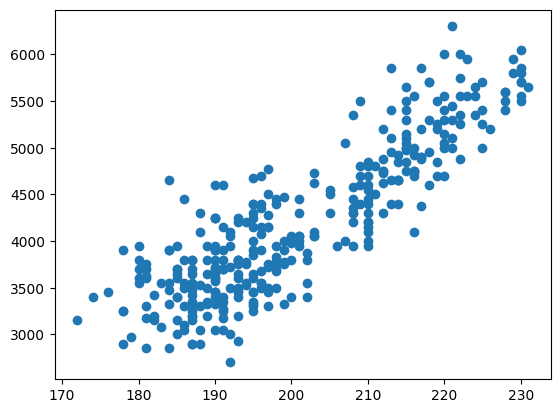

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('penguins')

plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.show()

1. matplotlib 패키지 중에서 pyplot 모듈을 plt로 불러온다.
2. 팔머 펭귄 데이터셋(penguins)을 불러온다.
3. 산점도를 나타내는 `scatter()` 함수 내에 $x$축과 $y$축 정보를 입력한다.
4. `plt.show()`를 통해 그래프를 출력한다.

매우 쉽게 그래프를 그릴 수 있으며, 결과를 통해 날개의 길이와 뭄무게가 비례한다는 것을 직관적으로 확인할 수 있다.

다른 종류의 그래프 역시 쉽게 표현할 수 있다. 이번에는 각 펭귄의 종 별 몸무게의 차이를 그래프로 나타내보자.

In [ ]:
df.groupby('species')['body_mass_g'].mean().reset_index()

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


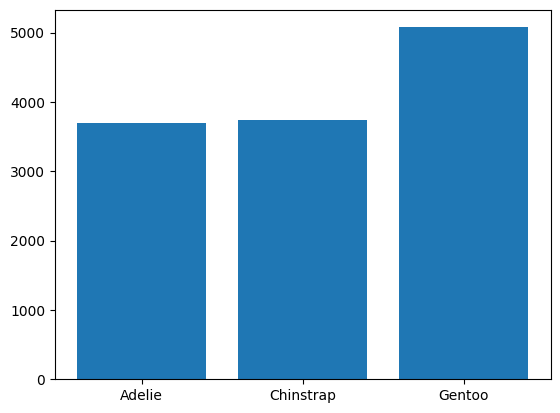

In [ ]:
df_group = df.groupby('species')['body_mass_g'].mean().reset_index()
plt.bar(x=df_group['species'], height=df_group['body_mass_g'])
plt.show()

1. 'species' 별로 그룹을 묶은 후, 'body_mass_g' 열의 평균을 구한다. 그 후 `reset_index()` 메서드를 통해 데이터프레임 형태로 나타낸다.
2. 막대그래프를 나타내는 `bar()` 함수 내에 $x$축과 높이 정보(height)를 입력한다.
3. `plt.show()`를 통해 그래프를 출력한다.

결과를 통해 Gentoo 종의 몸무게가 다른 종에 비해 많이 나간다는 점을 알 수 있다. 이번에는 몸무게의 분포를 히스토그램으로 나타내보자.

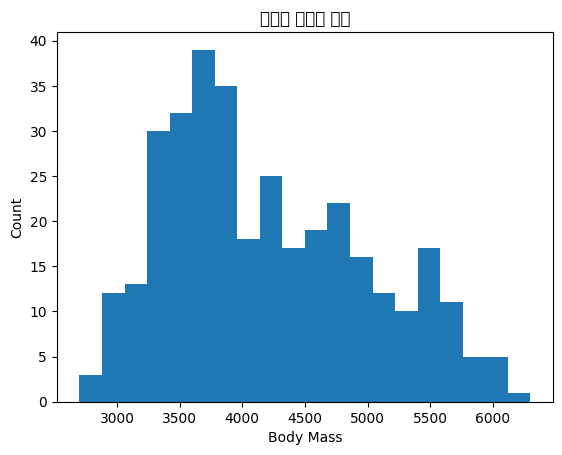

In [ ]:
plt.rc('font', family='Malgun Gothic')
plt.hist(df['body_mass_g'], bins=20)
plt.xlabel('Body Mass')
plt.ylabel('Count')
plt.title('펭귄의 몸무게 분포')
plt.show()

1. Matplotlib은 한글 폰트를 지원하지 않아 한글이 깨지는 현상이 발생하므로, 한글을 나타낼 수 있는 'Malgun Gothic'으로 폰트를 지정한다.
2. 히스토그램을 나타내는 `hist()` 함수 내에 나타내고자 하는 열을 입력한다. `bins` 인자에는 히스토그램을 몇개의 구간으로 나눌지를 입력한다.
3. $x$축과 $y$축 레이블, 제목에 원하는 글자를 입력한다.
4. `plt.show()`를 통해 그래프를 출력한다.

펭귄의 몸무게 분포를 히스토그램 형태로 표현할 수 있다. 이번에는 선 그래프를 나타내보도록 하자.

In [ ]:
import pandas as pd

df_unrate = pd.read_csv(
    'https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
)
df_unrate.head()

HTTPError: HTTP Error 404: Not Found

In [ ]:
df_unrate.info()

먼저 `read_csv()` 함수를 통해 세인트루이스 연방준비위원회에서 제공하는 미국 실업자 데이터를 받아온다.

In [ ]:
df_unrate['DATE'] = pd.to_datetime(df_unrate['DATE'])

plt.plot(df_unrate['DATE'], df_unrate['VALUE'])
plt.show()

1. 'DATE' 열을  datetime 객체로 변환한다.
2. `plot()` 함수는 선 그래프를 나타내며, $x$축과 $y$축 정보를 각각 입력한다.
3. `plt.show()`를 통해 그래프를 출력한다.

코로나 이후 실업률이 급증했음을 확인할 수 있다.

## pandas 패키지를 이용한 시각화

pandas 패키지는 matplotlib 패키지의 기능을 일부 내장하고 있어 시리즈 또는 데이터프레임 객체를 바로 그래프로 표현할 수 있으며, 그래프 종류는 다음과 같다.

- line: 선 그래프
- bar: 수직 막대 그래프
- barh: 수평 막대 그래프
- hist: 히스토그램
- box: 박스 플롯
- kde: 커널 밀도 그래프
- area: 면적 그래프
- pie: 파이 그래프
- scatter: 산점도 그래프
- hexbin: 고밀도 산점도 그래프

먼저 예제로 사용할 다이아몬드 데이터셋을 불러오도록 하자.

In [ ]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


데이터의 각 변수는 다음과 같다.

- carat: 다이아몬드 무게
- cut: 컷팅의 가치
- color: 다이아몬드 색상
- clarity: 깨끗한 정도
- depth: 깊이 비율, z / mean(x, y)
- table: 가장 넓은 부분의 너비 대비 다이아몬드 꼭대기의 너비
- price: 가격
- x: 길이
- y: 너비
- z: 깊이

먼저 carat과 price의 관계를 살펴보자.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52880 (\N{HANGUL SYLLABLE KAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47103 (\N{HANGUL SYLLABLE REOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

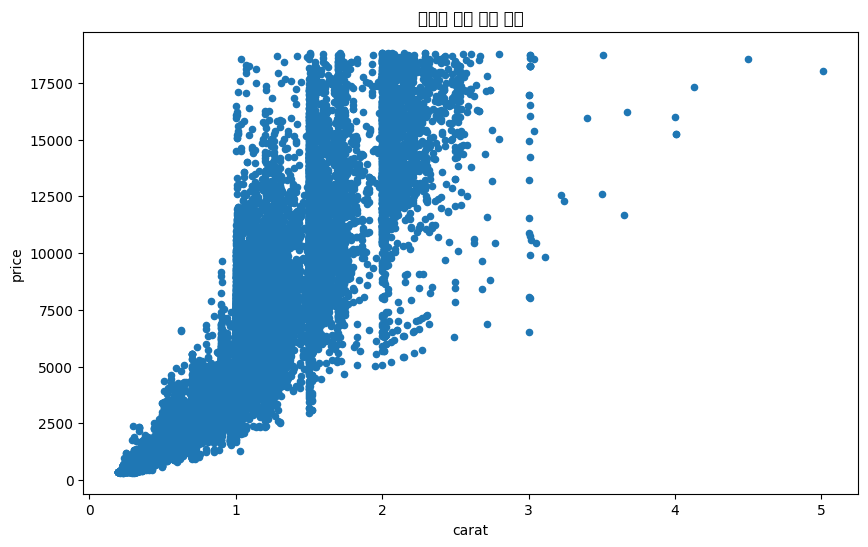

In [ ]:
plt.rc('font', family='Malgun Gothic')
df.plot.scatter(x='carat', y='price', figsize=(10, 6), title='캐럿과 가격 간의 관계')
plt.show()

데이터프레임에 `plot()` 메서드를 입력하고, 그 후 산점도에 해당하는 `scatter()`를 추가로 입력한다. $x$축과 $y$축 정보를 입력하고 figure 사이즈 및 제목을 입력하면 이에 해당하는 그래프가 출력된다. 이번에는 추가로 cut 별로 색을 다르게 표현해보도록 하자.

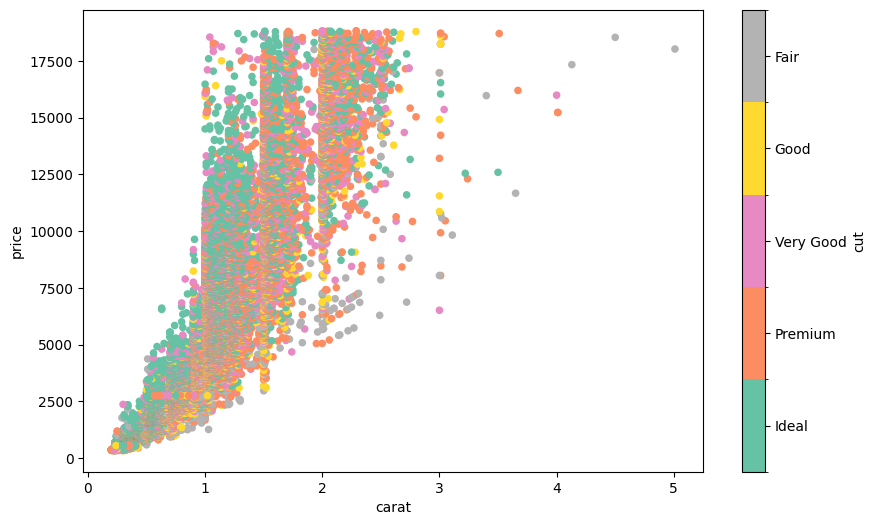

In [ ]:
df.plot.scatter(x='carat', y='price', c='cut', cmap='Set2', figsize=(10, 6))
plt.show()

c 인자에 색을 구분하고 싶은 열을 입력하며, cmap에는 파레트를 지정한다. 결과를 확인해보면 cut 별로 색이 다르게 표현되었다.

이번에는 price 열의 데이터를 히스토그램으로 표현해보도록 하자.

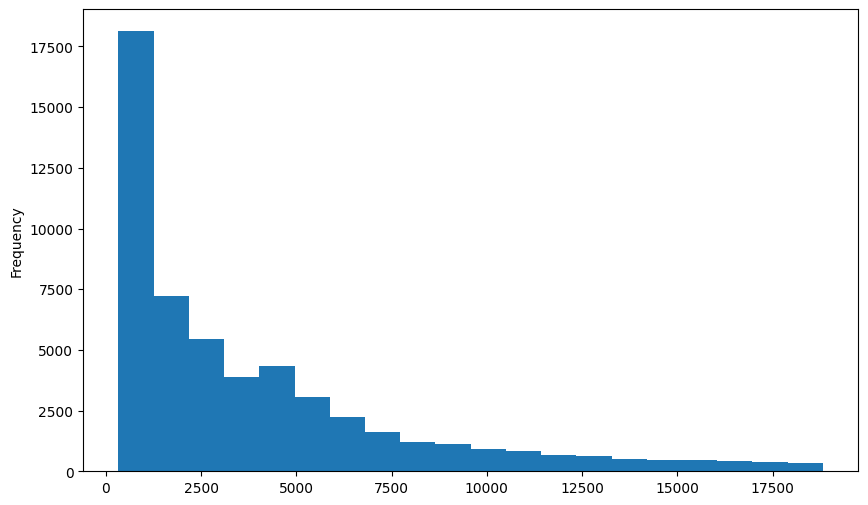

In [ ]:
df['price'].plot.hist(figsize=(10, 6), bins=20)
plt.show()

히스토그램으로 표현하고 싶은 열만 선택한 후, `plot.hist()` 메서드를 적용하면 히스토그램이 표현된다. matplotlib 패키지를 사용했을 때와 동일하게 bins 인자를 통해 몇개의 구간으로 나눌지도 선택할 수 있다.

이번에는 데이터 분석과 시각화를 동시에 진행해보도록 하자. color에 따른 carat의 평균을 막대 그래프로 나타내보도록 하겠다.

In [ ]:
df.groupby('color')['carat'].mean()

color
D    0.657795
E    0.657867
F    0.736538
G    0.771190
H    0.911799
I    1.026927
J    1.162137
Name: carat, dtype: float64

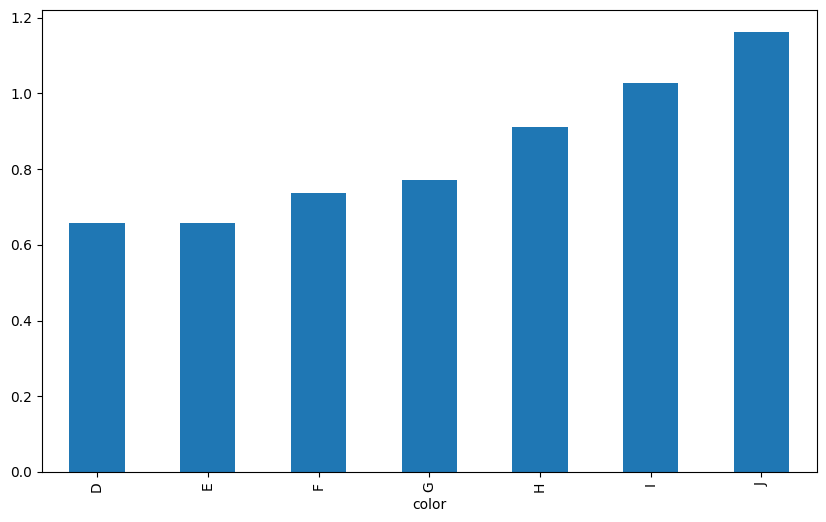

In [ ]:
df.groupby('color')['carat'].mean().plot.bar(figsize=(10, 6))
plt.show()

1. 'color' 별로 그룹을 묶은 후 'carat'의 평균을 구한다.
2. 구해진 값에 바로 `plot.bar()` 메서드를 적용해 막대 그래프로 표현한다.

이처럼 pandas 패키지를 사용하면 데이터 분석 및 시각화를 한 줄의 코드로 작성할 수 있다.

## seaborn 패키지를 이용한 시각화

seaborn 패키지는 matplotlib 패키지 보다 좀 더 화려하고 복잡한 그래프를 표현할 수 있다. 이번에는 예제로써 타이타닉 데이터셋을 이용한다.

In [ ]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

먼저 나이와 운임의 관계를 살펴보도록 하자.

In [ ]:
sns.scatterplot(data=df, x='age', y='fare')
plt.show()

`scatterplot()` 함수를 통해 산점도를 그릴 수 있다. data에는 사용하고자 하는 데이터를, x와 y에는 각각의 축 정보를 입력한다. 이번에는 각 그룹 별로 점의 색과 모양을 다르게 표현해보도록 하자.

In [ ]:
sns.scatterplot(data=df, x='age', y='fare', hue='class', style='class')
plt.show()

hue는 그룹 별 색을, style은 그룹 별 모양을 의미한다. class 별로 점의 색과 모양이 다르며, 'First' 클래스의 운임이 타 클래스 대비 훨씬 높음을 알 수 있다.

matplotlib이나 pandas로 표현하기 어려운 히트맵과 같은 복잡한 그림도 seaborn 패키지를 이용하면 매우 쉽게 나타낼 수 있다. 먼저 각 클래스와 성별에 따른 생존율을 계산해보도록 하자.

In [ ]:
df_pivot = df.pivot_table(index='class',
                          columns='sex',
                          values='survived',
                          aggfunc='mean')
df_pivot

`pivot_table()` 함수를 통해 행 인덱스는 class, 열 인덱스는 sex, 값은 survived, 집계 함수는 평균을 사용한다. 'survived' 열 에서 1은 생존, 0은 사망을 의미하므로, 평균은 생존율을 의미한다. 위 결과를 히트맵으로 나타내보자.

In [ ]:
sns.heatmap(df_pivot, annot=True, cmap='coolwarm')
plt.show()

`heatmap()` 함수를 통해 히트맵을 나타낼 수 있으며, annot은 데이터의 값을 표시할 지 여부를 의미한다. 또한 cmap은 팔레트 종류로써 coolwarm은 값이 높을 수록 붉은색, 낮을 수록 푸른색을 표현한다. class가 높을 수록 생존율이 높고, 남성에 비해 여성의 생존율이 높다는 것을 한 눈에 확인할 수 있다.